In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import PIL
import PIL.Image
import tensorflow as tf
import glob
import os
import shutil
import pandas as pd
from itertools import chain

### 1. Loading and Understanding the data 

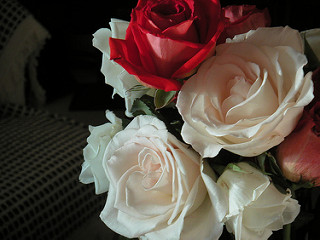

In [26]:
# import and visualization of data

roses = list(glob.glob('flowers/rose/*'))
PIL.Image.open(str(roses[0]))

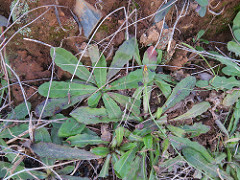

In [27]:
dandelion = list(glob.glob('flowers/dandelion/*'))
PIL.Image.open(str(dandelion[0]))

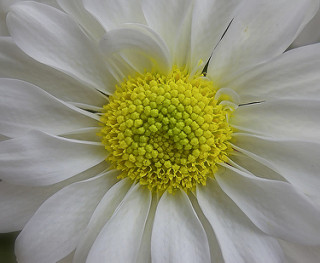

In [28]:
daisy = list(glob.glob('flowers/daisy/*'))
PIL.Image.open(str(daisy[0]))

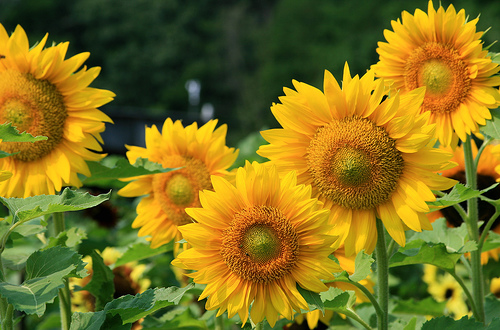

In [29]:
sunflower = list(glob.glob('flowers/sunflower/*'))
PIL.Image.open(str(sunflower[0]))

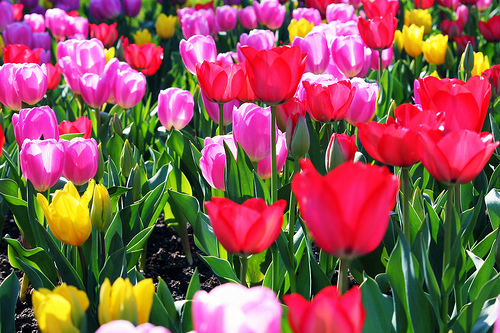

In [30]:
tulip = list(glob.glob('flowers/tulip/*'))
PIL.Image.open(str(tulip[0]))

### 2. Data Preparation

In [7]:
src = 'flowers/'
df_master = pd.DataFrame(columns={'Filename', 'Landscape'})

for i in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']:
    files = []
    df = pd.DataFrame(columns={'Filename', 'Landscape'})
    files.append(os.listdir(src+i))
    files = list(chain.from_iterable(files))
    df['Filename'] = files
    df['Landscape'] = i
    df_master = pd.concat([df_master, df], ignore_index=True)

In [8]:
df_master.head(2)

,Filename,Landscape
0,2346726545_2ebce2b2a6.jpg,daisy
1,3483303007_42e3f90da7.jpg,daisy


In [10]:
df_master.shape, df_master['Filename'].nunique()

((4317, 2), 4313)

In [25]:
df.shape

(984, 2)

In [11]:
df_master = df_master.drop_duplicates(subset=['Filename'])
df_master.reset_index(drop=True, inplace=True)

In [12]:
y = df_master[['Landscape']]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_master, y, test_size=0.3, stratify=y, random_state=0)

In [21]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [22]:
X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [24]:
# Splitting Train data into train and validation and creating folder structure for train, val and test dataloader

import pandas as pd

X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

import os 
import shutil

for i, j in zip(X_train['Filename'].values, X_train['Landscape'].values):
    src = 'flowers/'+ j +'/' + i
    dst = 'train/' + str(j)
    
    isExist = os.path.exists(dst)

    if not isExist:
        os.makedirs(dst)
    shutil.copy(src, dst) 

for i, j in zip(X_test['Filename'].values, X_test['Landscape'].values):
    src = 'flowers/'+ j +'/' + i
    dst = 'test/' + str(j)
    
    isExist = os.path.exists(dst)

    if not isExist:
        os.makedirs(dst)
    shutil.copy(src, dst) 

### 3. Train, tune, test, and Compare Deep Learning image classifier model using

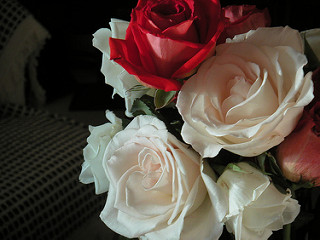

In [26]:
# import and visualization of data

roses = list(glob.glob('train/rose/*'))
PIL.Image.open(str(roses[0]))

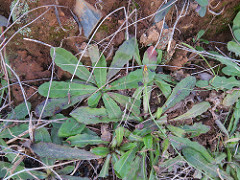

In [27]:
dandelion = list(glob.glob('train/dandelion/*'))
PIL.Image.open(str(dandelion[0]))

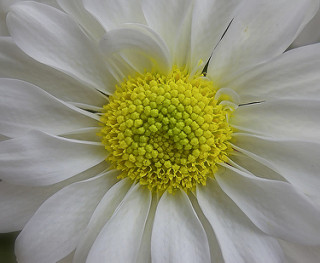

In [28]:
daisy = list(glob.glob('train/daisy/*'))
PIL.Image.open(str(daisy[0]))

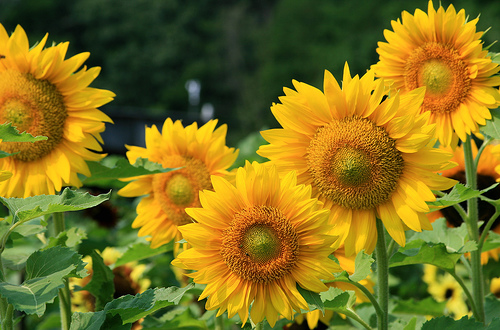

In [29]:
sunflower = list(glob.glob('train/sunflower/*'))
PIL.Image.open(str(sunflower[0]))

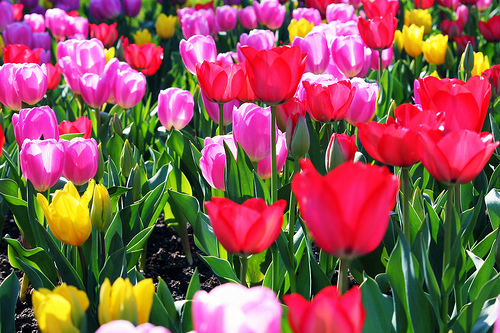

In [30]:
tulip = list(glob.glob('train/tulip/*'))
PIL.Image.open(str(tulip[0]))

In [39]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [42]:
train_dir = '/media/debadri/New Volume/Skills/IIIT Delhi PGD/Modules/07-Deep Learning/Assignment 2/train'
validation_dir = '/media/debadri/New Volume/Skills/IIIT Delhi PGD/Modules/07-Deep Learning/Assignment 2/test'

In [43]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 16, class_mode = 'categorical', target_size = (224, 224))
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 16, class_mode = 'categorical', target_size = (224, 224))

Found 3019 images belonging to 5 classes.
Found 1294 images belonging to 5 classes.


In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [62]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(224, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [64]:
cnn_model = model.fit(train_generator, validation_data = validation_generator, epochs=2)

Epoch 1/2
189/189 [==============================] - 453s 2s/step - loss: 9.2256 - acc: 0.2199 - val_loss: 9.4417 - val_acc: 0.2272
Epoch 2/2
189/189 [==============================] - 480s 3s/step - loss: 9.4498 - acc: 0.2272 - val_loss: 9.4417 - val_acc: 0.2272


In [65]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test_generator = test_datagen.flow_from_directory('/media/debadri/New Volume/Skills/IIIT Delhi PGD/Modules/07-Deep Learning/Assignment 2/test',
                              class_mode=None,
                              shuffle=False,
                              target_size=(224, 224))

    
preds_normal = model.predict_generator(test_generator)

Found 1294 images belonging to 5 classes.


In [55]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [56]:
for layer in base_model.layers:
    layer.trainable = False

In [57]:
x = layers.Flatten()(base_model.output)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.1)(x)

x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [59]:
vgghist = model.fit(train_generator, validation_data = validation_generator, epochs=2)

Epoch 1/2
189/189 [==============================] - 842s 4s/step - loss: 0.9690 - acc: 0.6370 - val_loss: 0.6493 - val_acc: 0.7573
Epoch 2/2
189/189 [==============================] - 898s 5s/step - loss: 0.7281 - acc: 0.7277 - val_loss: 0.6406 - val_acc: 0.7651


In [60]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test_generator = test_datagen.flow_from_directory('/media/debadri/New Volume/Skills/IIIT Delhi PGD/Modules/07-Deep Learning/Assignment 2/test',
                              class_mode=None,
                              shuffle=False,
                              target_size=(224, 224))

    
preds = model.predict_generator(test_generator)

Found 1294 images belonging to 5 classes.


In [66]:
preds_pretrained_cls_idx = preds.argmax(axis=1)
preds_normal_cls_idx = preds_normal.argmax(axis=1)

In [67]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions_pretrained = [labels[k] for k in preds_pretrained_cls_idx]
predictions_normal = [labels[k] for k in preds_normal_cls_idx]

In [83]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Landscape_normal_preds":predictions_normal,
                      "Landscape_pretrained_preds":predictions_pretrained})

In [84]:
results.head()

,Filename,Landscape_normal_preds,Landscape_pretrained_preds
0,daisy/1031799732_e7f4008c03.jpg,tulip,daisy
1,daisy/10437754174_22ec990b77_m.jpg,tulip,daisy
2,daisy/10555749515_13a12a026e.jpg,tulip,daisy
3,daisy/105806915_a9c13e2106_n.jpg,tulip,daisy
4,daisy/10841136265_af473efc60.jpg,tulip,tulip


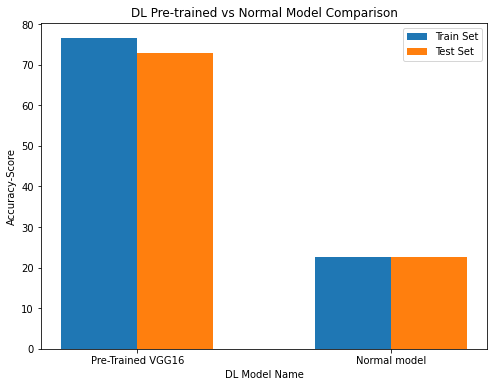

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

y1 = [76.5, 22.7]
y2 = [72.77, 22.7]

ind = np.arange(2)

# Figure size
plt.figure(figsize=(8,6))

width = 0.3       

plt.bar(ind, y1 , width, label='Train Set')
plt.bar(ind + width, y2, width, label='Test Set')

plt.xlabel('DL Model Name')
plt.ylabel('Accuracy-Score')
plt.title('DL Pre-trained vs Normal Model Comparison')

plt.xticks(ind + width / 2, ('Pre-Trained VGG16', 'Normal model'))

plt.legend(loc='best')
plt.show()

Conclusion:

- Pretrained model produced better results
- Transfer learning is highly effective on small sized datasets